# Лабораторная работа "Разведочный анализ данных. Исследование и визуализация данных."
## Цель работы

Изучение различных методов визуализация данных.

## Задание
* Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь. Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

Создать ноутбук, который содержит следующие разделы:
Текстовое описание выбранного Вами набора данных.
Основные характеристики датасета.
Визуальное исследование датасета.
Информация о корреляции признаков.
Сформировать отчет и разместить его в своем репозитории на github.
## Описание набора данных

Доклад о мировом счастье является знаковым исследованием состояния глобального счастья.

Оценки основаны на ответах на основной вопрос оценки жизни, заданный в опросе. Этот вопрос, известный как Кантрильная лестница, просит респондентов подумать о лестнице с наилучшей возможной жизнью для них, равной 10, и наихудшей возможной жизнью, равной 0, и оценить свою текущую жизнь по этой шкале.


Какие страны или регионы имеют наибольшее общее счастье, и каждый из шести факторов способствует счастью?

In [0]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [0]:
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/ММО/lab1/data/2017.csv', sep=",")

In [0]:
# Первые 5 строк датасета
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [0]:
# Размер датасета
data.shape

(155, 12)

In [0]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 155


In [0]:
# Список колонок
data.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [0]:
# Список колонок с типами данных
data.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [0]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Country - 0
Happiness.Rank - 0
Happiness.Score - 0
Whisker.high - 0
Whisker.low - 0
Economy..GDP.per.Capita. - 0
Family - 0
Health..Life.Expectancy. - 0
Freedom - 0
Generosity - 0
Trust..Government.Corruption. - 0
Dystopia.Residual - 0


In [0]:
# Основные статистические характеристки набора данных
data.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [0]:
# Определим уникальные значения для целевого признака
data['Happiness.Score'].unique()

array([7.53700018, 7.52199984, 7.50400019, 7.49399996, 7.46899986,
       7.37699986, 7.31599998, 7.31400013, 7.28399992, 7.21299982,
       7.079     , 7.00600004, 6.99300003, 6.97700024, 6.95100021,
       6.89099979, 6.86299992, 6.71400023, 6.65199995, 6.64799976,
       6.63500023, 6.60900021, 6.59899998, 6.57800007, 6.57200003,
       6.52699995, 6.454     , 6.45200014, 6.44199991, 6.42399979,
       6.42199993, 6.40299988, 6.375     , 6.35699987, 6.34399986,
       6.16800022, 6.10500002, 6.09800005, 6.08699989, 6.08400011,
       6.0710001 , 6.0079999 , 6.00299978, 5.97300005, 5.97100019,
       5.96400023, 5.96299982, 5.95599985, 5.92000008, 5.90199995,
       5.87200022, 5.8499999 , 5.83799982, 5.82499981, 5.82299995,
       5.82200003, 5.81899977, 5.80999994, 5.7579999 , 5.71500015,
       5.62900019, 5.62099981, 5.61100006, 5.56899977, 5.5250001 ,
       5.5       , 5.49300003, 5.47200012, 5.42999983, 5.39499998,
       5.33599997, 5.32399988, 5.31099987, 5.29300022, 5.27899

# Визуальное исследование датасета
## Диаграмма рассеяния

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

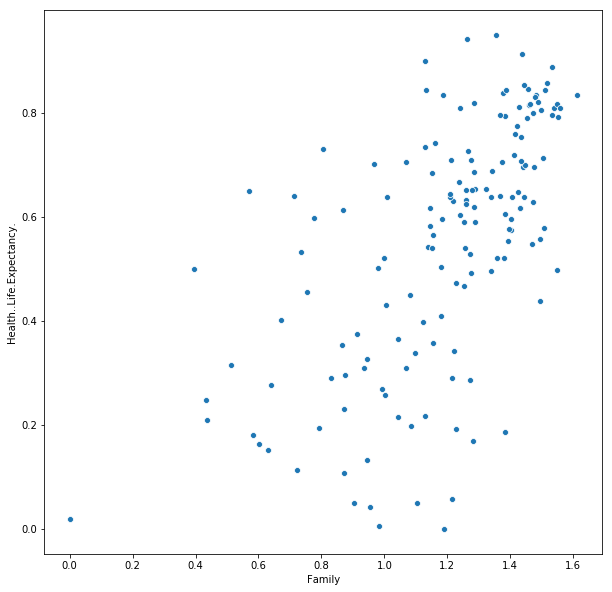

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Family', y='Health..Life.Expectancy.', data=data)

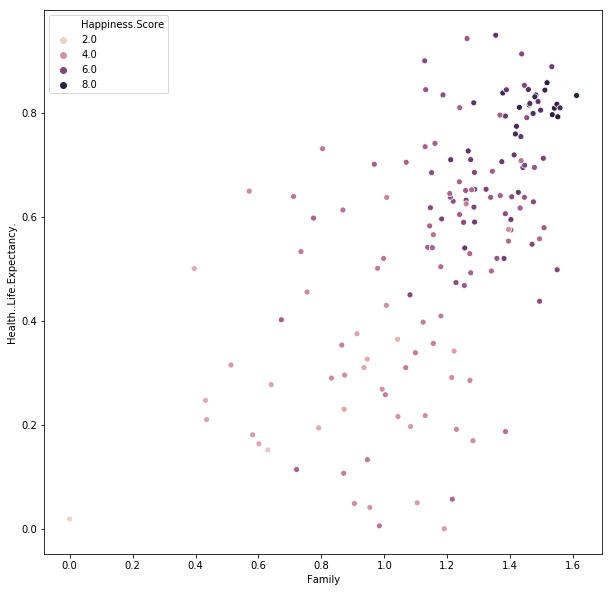

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Family', y='Health..Life.Expectancy.', data=data, hue='Happiness.Score')

## Гистограмма
Позволяет оценить плотность вероятности распределения данных.

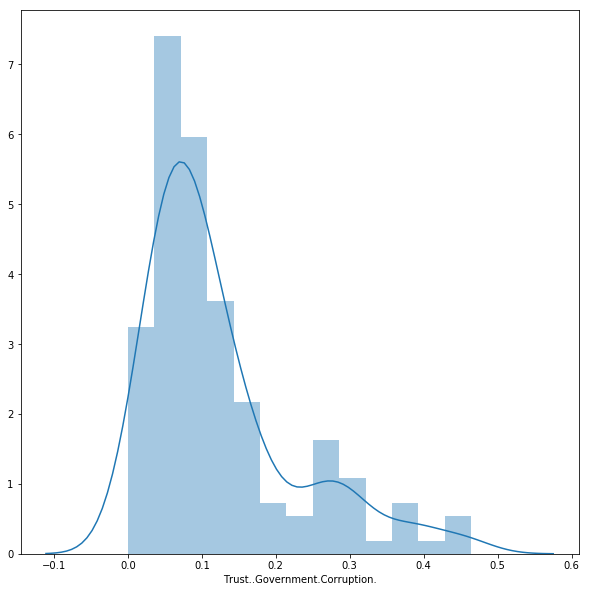

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Trust..Government.Corruption.'])

# Jointplot
Комбинация гистограмм и диаграмм рассеивания.


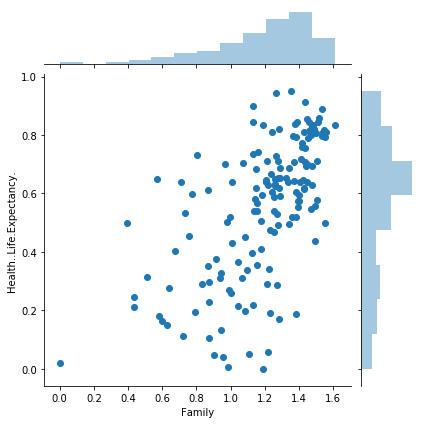

In [0]:
sns.jointplot(x='Family', y='Health..Life.Expectancy.', data=data)

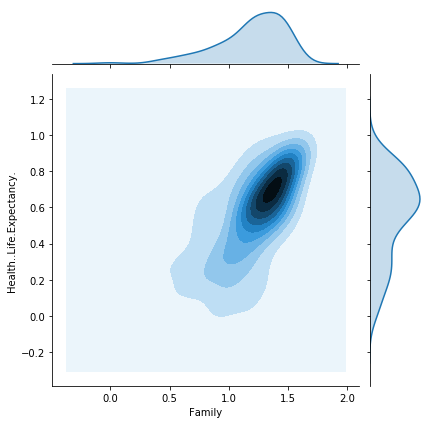

In [0]:
sns.jointplot(x='Family', y='Health..Life.Expectancy.', data=data, kind="kde")

## Парные диаграммы
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

In [0]:
sns.pairplot(data)

NameError: ignored

## Ящик с усами
Отображает одномерное распределение вероятности.

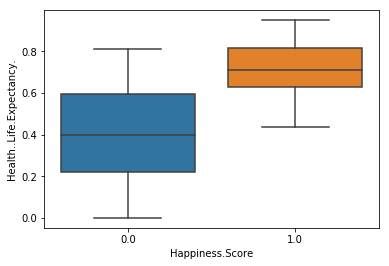

In [0]:
sns.boxplot(x='Happiness.Score', y='Health..Life.Expectancy.', data=data)

## Violin plot

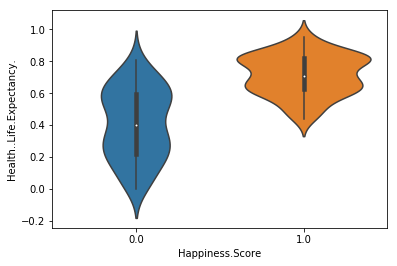

In [0]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='Happiness.Score', y='Health..Life.Expectancy.', data=data)

# Информация о корреляции признаков

In [0]:
data.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.864582,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.864582,1.000000,0.830493,0.828049,0.699362,0.625863,0.648365,0.464425,0.067236,0.345415,0.393851
Whisker.high,-0.993058,0.830493,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.828049,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.699362,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.625863,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.648365,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.464425,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.067236,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.345415,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


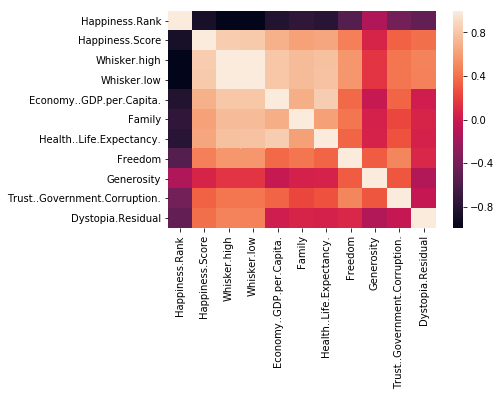

In [0]:
sns.heatmap(data.corr())

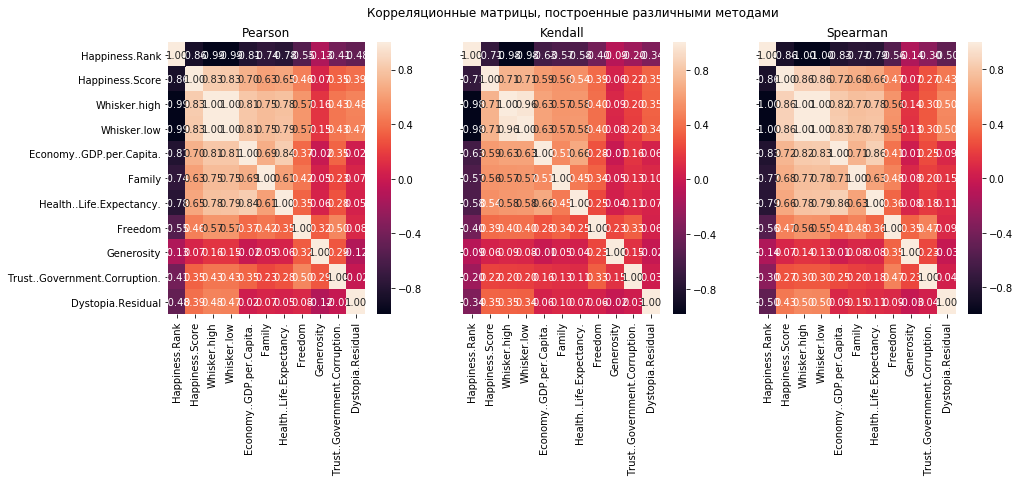

In [0]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')